In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tqdm import trange
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [2]:
X = load_iris().data
y = load_iris().target

In [24]:
from sllearn import KFarthestClassifier

In [4]:
kfn = KFarthestClassifier(3)
kfn.fit(X, y)
kfn.score(X, y)

0.58

In [5]:
kfn2 = KFarthestClassifier(3)
kfn2.fit(X[y != 2], y[y != 2])
kfn2.score(X[y != 2], y[y != 2])

0.99

## Perform on Iris Dataset

In [6]:
iris_dataset = load_iris()
print("iris.keys():\n{}".format(iris_dataset.keys()))

iris.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
df = pd.DataFrame.from_dict(iris_dataset['data']) #Feature variables
df.columns = iris_dataset['feature_names'] #ADD the feature_names as column labels
df.head(5) #DISPLAY the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df = (df - df.mean(axis=0)) / df.std(axis=0)
df['target'] = iris_dataset['target'] #ADD the target as another column
print(df.shape)
df.head(5) #DISPLAY the first five rows

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0


In [11]:
knn_all_training = pd.DataFrame()
knn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                        df['target'], 
                                                        test_size=0.25,
                                                        random_state=seedN)
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, len(X_train)) # try n_neighbors from 1 to n-1

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    knn_all_training[seedN] = training_accuracy
    knn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


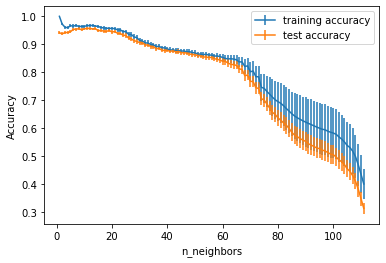

In [12]:
plt.errorbar(neighbors_settings, knn_all_training.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [9]:
kfn_all_training = pd.DataFrame()
kfn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                        df['target'], 
                                                        test_size=0.25,
                                                        random_state=seedN)
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    training_accuracy = []
    test_accuracy = []
    farthest_settings = range(1, len(X_train)) # try n_farthest from 1 to n-1

    for n_farthest in farthest_settings:   
        clf = KFarthestClassifier(n_farthest=n_farthest)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    kfn_all_training[seedN] = training_accuracy
    kfn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.38it/s]


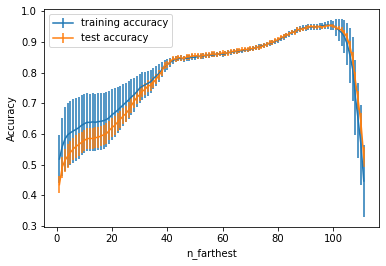

In [10]:
plt.errorbar(farthest_settings, kfn_all_training.mean(axis=1),
             yerr=kfn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_farthest")
plt.legend()
plt.show()

### Cross kNN and kFN

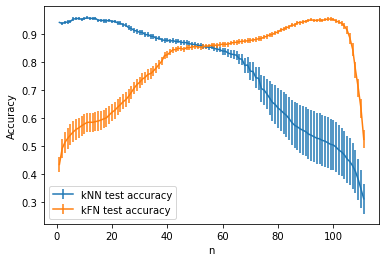

kNN Maximum Test Accuracy is 0.9573684210526308 for 11 neighbors
kFN Maximum Test Accuracy is 0.9531578947368413 for 99 neighbors


In [13]:
knn_means = knn_all_test.mean(axis=1)
kfn_means = kfn_all_test.mean(axis=1)

plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="kNN test accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="kFN test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n")
plt.legend()
plt.show()

print(f'kNN Maximum Test Accuracy is {knn_means[knn_means.argmax()]}'
      f' for {neighbors_settings[knn_means.argmax()]} neighbors')
print(f'kFN Maximum Test Accuracy is {kfn_means[kfn_means.argmax()]}'
      f' for {farthest_settings[kfn_means.argmax()]} neighbors')

## Perform on Wine Dataset

In [14]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()
print("wine.keys():\n{}".format(wine_dataset.keys()))

wine.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [15]:
df = pd.DataFrame.from_dict(wine_dataset['data']) #Feature variables
df.columns = wine_dataset['feature_names'] #ADD the feature_names as column labels
df.head(5) #DISPLAY the first five rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
df = (df - df.mean(axis=0)) / df.std(axis=0)
df['target'] = wine_dataset['target'] #ADD the target as another column
print(df.shape)
df.head(5) #DISPLAY the first five rows

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0


In [17]:
knn_all_training = pd.DataFrame()
knn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                        df['target'], 
                                                        test_size=0.25,
                                                        random_state=seedN)
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, len(X_train)) # try n_neighbors from 1 to n-1

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    knn_all_training[seedN] = training_accuracy
    knn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [03:28<00:00,  2.08s/it]


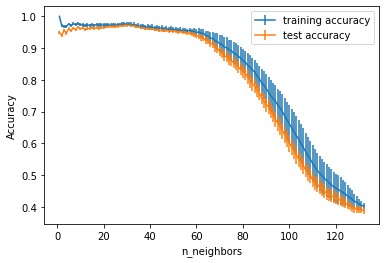

In [18]:
plt.errorbar(neighbors_settings, knn_all_training.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [19]:
kfn_all_training = pd.DataFrame()
kfn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                        df['target'], 
                                                        test_size=0.25,
                                                        random_state=seedN)
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    training_accuracy = []
    test_accuracy = []
    farthest_settings = range(1, len(X_train)) # try n_farthest from 1 to n-1

    for n_farthest in farthest_settings:   
        clf = KFarthestClassifier(n_farthest=n_farthest)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    kfn_all_training[seedN] = training_accuracy
    kfn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [02:01<00:00,  1.21s/it]


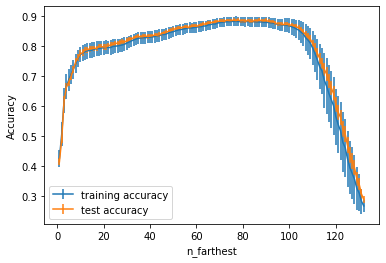

In [20]:
plt.errorbar(farthest_settings, kfn_all_training.mean(axis=1),
             yerr=kfn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_farthest")
plt.legend()
plt.show()

### Cross kNN and kFN

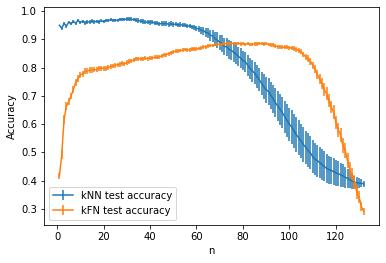

kNN Maximum Test Accuracy is 0.9719999999999988 for 31 neighbors
kFN Maximum Test Accuracy is 0.8866666666666658 for 78 neighbors


In [21]:
knn_means = knn_all_test.mean(axis=1)
kfn_means = kfn_all_test.mean(axis=1)

plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="kNN test accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="kFN test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n")
plt.legend()
plt.show()

print(f'kNN Maximum Test Accuracy is {knn_means[knn_means.argmax()]}'
      f' for {neighbors_settings[knn_means.argmax()]} neighbors')
print(f'kFN Maximum Test Accuracy is {kfn_means[kfn_means.argmax()]}'
      f' for {farthest_settings[kfn_means.argmax()]} neighbors')

X.shape: (200, 2)


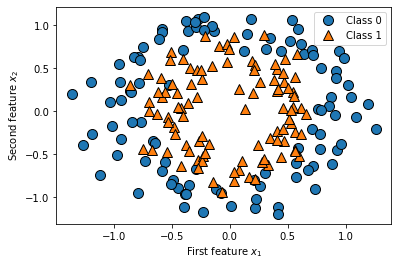

In [20]:
from sklearn.datasets import make_circles
import mglearn

X, y = make_circles(200, noise=0.15, factor=0.6, random_state=0)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("First feature $x_1$")
plt.ylabel("Second feature $x_2$")
print("X.shape: {}".format(X.shape))
plt.savefig('figures/figure11.png', transparent=True)
plt.show()

In [21]:
knn_all_training = pd.DataFrame()
knn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, 
                                                        test_size=0.25,
                                                        random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, len(X_train)) # try n_neighbors from 1 to n-1

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    knn_all_training[seedN] = training_accuracy
    knn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [02:34<00:00,  1.54s/it]


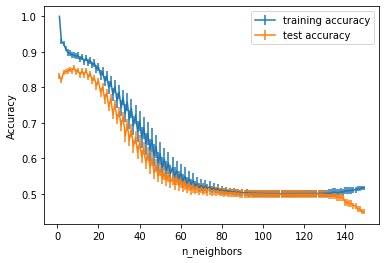

In [22]:
plt.errorbar(neighbors_settings, knn_all_training.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [25]:
kfn_all_training = pd.DataFrame()
kfn_all_test = pd.DataFrame()
for seedN in trange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, 
                                                        test_size=0.25,
                                                        random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    farthest_settings = range(1, len(X_train)) # try n_farthest from 1 to n-1

    for n_farthest in farthest_settings:   
        clf = KFarthestClassifier(n_farthest=n_farthest)  # build the model
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    kfn_all_training[seedN] = training_accuracy
    kfn_all_test[seedN] = test_accuracy

100%|█████████████████████████████████████████| 100/100 [02:00<00:00,  1.20s/it]


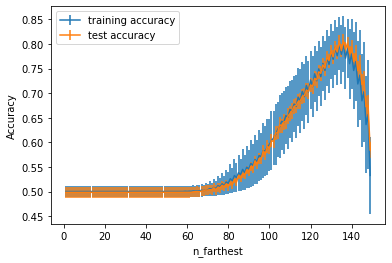

In [26]:
plt.errorbar(farthest_settings, kfn_all_training.mean(axis=1),
             yerr=kfn_all_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_farthest")
plt.legend()
plt.show()

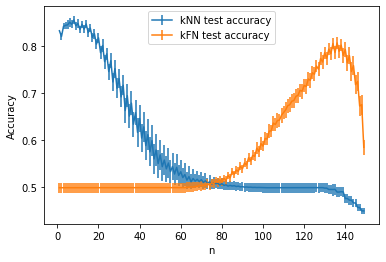

kNN Maximum Test Accuracy is 0.8555999999999999 for 8 neighbors
kFN Maximum Test Accuracy is 0.8068 for 136 neighbors


In [27]:
knn_means = knn_all_test.mean(axis=1)
kfn_means = kfn_all_test.mean(axis=1)

plt.errorbar(neighbors_settings, knn_all_test.mean(axis=1),
             yerr=knn_all_training.std(axis=1)/2, label="kNN test accuracy")
plt.errorbar(farthest_settings, kfn_all_test.mean(axis=1),
             yerr=kfn_all_test.std(axis=1)/6, label="kFN test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n")
plt.legend()
plt.show()

print(f'kNN Maximum Test Accuracy is {knn_means[knn_means.argmax()]}'
      f' for {neighbors_settings[knn_means.argmax()]} neighbors')
print(f'kFN Maximum Test Accuracy is {kfn_means[kfn_means.argmax()]}'
      f' for {farthest_settings[kfn_means.argmax()]} neighbors')